In [23]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def disp_H(x):

    cc = round(x[0],2)
    ch = round(x[1],2)
    tcc = round(x[2],2)
    tch = round(x[3],2)
    
    H = np.array([
        np.array([cc,tch,0,0,0,tch,tcc,0,0,0,0,0]),
        np.array([tch,ch,tch,0,0,0,0,0,0,0,0,0]),
        np.array([0,tch,cc,tch,0,0,0,0,tcc,0,0,0]),
        np.array([0,0,tch,ch,tch,0,0,0,0,0,0,0]),
        np.array([0,0,0,tch,ch,tch,0,0,0,0,0,0]),
        np.array([tch,0,0,0,tch,ch,0,0,0,0,0,0]),    
        np.array([tcc,0,0,0,0,0,cc,tch,0,0,0,tch]),
        np.array([0,0,0,0,0,0,tch,ch,tch,0,0,0]),
        np.array([0,0,tcc,0,0,0,0,tch,cc,tch,0,0]),
        np.array([0,0,0,0,0,0,0,0,tch,ch,tch,0]),
        np.array([0,0,0,0,0,0,0,0,0,tch,ch,tch]),
        np.array([0,0,0,0,0,0,tch,0,0,0,tch,ch])
    ])
    print(H)

def test_H(x, H):

#     cc = x[0]
#     ch = x[1]
#     tcc = x[1]
#     tch = x[3]
    
#     H = np.array([
#         np.array([cc,tch,0,0,0,tch,tcc,0,0,0,0,0]),
#         np.array([tch,ch,tch,0,0,0,0,0,0,0,0,0]),
#         np.array([0,tch,cc,tch,0,0,0,0,tcc,0,0,0]),
#         np.array([0,0,tch,ch,tch,0,0,0,0,0,0,0]),
#         np.array([0,0,0,tch,ch,tch,0,0,0,0,0,0]),
#         np.array([tch,0,0,0,tch,ch,0,0,0,0,0,0]),    
#         np.array([tcc,0,0,0,0,0,cc,tch,0,0,0,tch]),
#         np.array([0,0,0,0,0,0,tch,ch,tch,0,0,0]),
#         np.array([0,0,tcc,0,0,0,0,tch,cc,tch,0,0]),
#         np.array([0,0,0,0,0,0,0,0,tch,ch,tch,0]),
#         np.array([0,0,0,0,0,0,0,0,0,tch,ch,tch]),
#         np.array([0,0,0,0,0,0,tch,0,0,0,tch,ch])
#     ])

#     H = np.array([
#         np.array([cc,tch,0,0,0,tch,0,0,tcc,0,0,0]), # 1
#         np.array([tch,ch,tch,0,0,0,0,0,0,0,0,0]),   # 2
#         np.array([0,tch,cc,tch,0,0,0,0,0,0,tcc,0]), # 3
#         np.array([0,0,tch,ch,tch,0,0,0,0,0,0,0]),   # 4
#         np.array([0,0,0,tch,cc,tch,tcc,0,0,0,0,0]), # 5
#         np.array([tch,0,0,0,tch,ch,0,0,0,0,0,0]),   # 6
#         np.array([0,0,0,0,tcc,0,cc,tch,0,0,0,tch]), # 7
#         np.array([0,0,0,0,0,0,tch,ch,tch,0,0,0]),   # 8
#         np.array([tcc,0,0,0,0,0,0,tch,cc,tch,0,0]), # 9
#         np.array([0,0,0,0,0,0,0,0,tch,ch,tch,0]),   # 10
#         np.array([0,0,tcc,0,0,0,0,0,0,tch,cc,tch]), # 11
#         np.array([0,0,0,0,0,0,tch,0,0,0,tch,ch])    # 12
#     ])
    
#     H = np.array([[cc,tcc],
#             [tcc,cc]])
    
    E_t = np.linalg.eig(H)[0]
    return E_t
    
def f(x, H, Ed):
    """
    x is the unknowns
    """

    E_t = np.linalg.eig(H)[0]
#     E_d = [-7.65165, -7.65165, -6.80908,-6.80908, -5.2358,-5.2358,
#            -1.79467,-1.79467,0.27853,0.27853,0.37911,0.37911]
    #    E_d = get_dft_energies(23,35,"C6H4_C6H4",conf="B")


    diff = np.subtract(Ed, E_t)
#     print(np.linalg.norm(diff))
    return np.linalg.norm(diff)


def get_dft_energies(low, high, pref, conf='B'):

    states = list(range(low,high))
    
    fname = f"/scratch/kilian/out/conf_{conf}/{pref}/{pref}_scf.pwo"
    with open(fname) as f:
        lines = f.readlines()
    
    for i,line in enumerate(lines):
        if " k = 0.0000 0.0000 0.0000" in line:
            loi = i
    
    l1 = [float(e) for e in lines[loi+2].split()]
    l2 = [float(e) for e in lines[loi+3].split()]
    l3 = [float(e) for e in lines[loi+4].split()]
    l4 = [float(e) for e in lines[loi+5].split()]
    l5 = [float(e) for e in lines[loi+6].split()]
    l6 = [float(e) for e in lines[loi+7].split()]
    l7 = [float(e) for e in lines[loi+8].split()]
    all_eigs = l1+l2+l3+l4+l5+l6+l7
#     return np.array([-6.98890,-6.96555,-6.50099,-6.41836,-4.56937,-4.54055,
#                      -0.55548,-0.48118,0.27372,0.77300,0.91215,1.55538])
    return np.array(all_eigs[low-1:high-1])


In [25]:
print('h')

h


In [26]:
def get_simple_ham_C6H4_C6H4(cc,tcc):
    return np.array([
        np.array([cc,tcc,0,0,0,tcc,tcc,0,0,0,0,0]), # 1
        np.array([tcc,cc,tcc,0,0,0,0,0,0,0,0,0]),   # 2
        np.array([0,tcc,cc,tcc,0,0,0,0,tcc,0,0,0]), # 3
        np.array([0,0,tcc,cc,tcc,0,0,0,0,0,0,0]),   # 4
        np.array([0,0,0,tcc,cc,tcc,0,0,0,0,0,0]),   # 5
        np.array([tcc,0,0,0,tcc,cc,0,0,0,0,0,0]),   # 6
        np.array([tcc,0,0,0,0,0,cc,tcc,0,0,0,tcc]), # 7
        np.array([0,0,0,0,0,0,tcc,cc,tcc,0,0,0]),   # 8
        np.array([0,0,tcc,0,0,0,0,tcc,cc,tcc,0,0]), # 9
        np.array([0,0,0,0,0,0,0,0,tcc,cc,tcc,0]),   # 10
        np.array([0,0,0,0,0,0,0,0,0,tcc,cc,tcc]),   # 11
        np.array([0,0,0,0,0,0,tcc,0,0,0,tcc,cc])    # 12
    ])

def get_complex_ham_C6H4_C6H4(cc, ch, tcc, tch):
    return  np.array([
        np.array([cc,tch,0,0,0,tch,tcc,0,0,0,0,0]), # 1
        np.array([tch,ch,tch,0,0,0,0,0,0,0,0,0]),   # 2
        np.array([0,tch,cc,tch,0,0,0,0,tcc,0,0,0]), # 3
        np.array([0,0,tch,ch,tch,0,0,0,0,0,0,0]),   # 4
        np.array([0,0,0,tch,ch,tch,0,0,0,0,0,0]),   # 5
        np.array([tch,0,0,0,tch,ch,0,0,0,0,0,0]),   # 6
        np.array([tcc,0,0,0,0,0,cc,tch,0,0,0,tch]), # 7
        np.array([0,0,0,0,0,0,tch,ch,tch,0,0,0]),   # 8
        np.array([0,0,tcc,0,0,0,0,tch,cc,tch,0,0]), # 9
        np.array([0,0,0,0,0,0,0,0,tch,ch,tch,0]),   # 10
        np.array([0,0,0,0,0,0,0,0,0,tch,ch,tch]),   # 11
        np.array([0,0,0,0,0,0,tch,0,0,0,tch,ch])    # 12
    ])

In [119]:
E_ds = {"C6H4_C6H4":[-7.6850,  -7.6417, -7.1514,  -6.3527,  -5.7582, -5.1511,  -1.7408,  -0.7443,  -0.5467,  -0.3074,-0.0688,  0.4170],
       "C6H4_C5NH3":[-7.75876,-7.73804,-7.03079,-6.17319,-5.71742,-5.20198,-1.88101,-1.33702,-0.85600,-0.59321,-0.19417,-0.01602],
        "C6H4_C5NH3a":[-7.85219, -7.43046,-6.83082, -6.39979,-6.06896,-5.32907,-2.44070,-1.75735,-0.74325,-0.68806,-0.23493,-0.02304],
        "C5NH3_C5NH3":[-7.87580,-7.08429,-7.01230,-6.68117,-5.32006,-5.26541,-1.81577,-1.68893,-1.38401,-0.42774,-0.23462,-0.03888],
        "C5NH3_C5NH3a":[-7.97772,-7.47116,-7.04215,-6.56109,-5.39689,-5.31662,-2.02018,-1.61849,-1.50262,-0.75659,-0.09366,0.00465],
        "C5NH3a_C5NH3a":[]
       }

E_ts_s = {"C6H4_C6H4":E_t1,
         "C6H4_C5NH3":E_t2,
         "C6H4_C5NH3a":E_t3,
         "C5NH3_C5NH3":E_t4,
         "C5NH3_C5NH3a":E_t5}

E_ts_c = {"C6H4_C6H4":E_t1b,
         "C6H4_C5NH3":E_t2b,
         "C6H4_C5NH3a":E_t3b,
         "C5NH3_C5NH3":E_t4b,
         "C5NH3_C5NH3a":E_t5b}



## C6H4_C6H4, 1D

In [29]:
# 1d C6H4_C6H4 simple
E_d = [-7.6850,  -7.6417, -7.1514,  -6.3527,  -5.7582, -5.1511,  -1.7408,  -0.7443,  -0.5467,  -0.3074,
       -0.0688,  0.4170]


min_err = 15
for cc in np.linspace(-8,0,14):
    for tcc in np.linspace(-8,0,14):
            x = [cc, tcc]
            H = get_simple_ham_C6H4_C6H4(cc, tcc)
            opt = minimize(f, x, args=(H,E_ds['C6H4_C6H4']), method='Nelder-Mead')
            if opt.fun < min_err + .5:
                min_err = opt.fun
                print(round(cc,3), round(tcc,3), "   ", opt.fun)
                E_t1 = test_H(opt.x,H)
                E_t1.sort()



#                    np.linalg.norm(np.subtract(E_d,E_t))
#                     for i in range(len(E_d)):
#                         print(round(E_d[i],3), "   ",round(E_t[i],3))
        #         elif abs(opt.fun - min_err) < .5:
        #             print(round(cc,3),round(tcc,3), "   ", opt.fun, 'nl')




-6.769 -1.846     14.81092317201734
-6.769 -0.615     14.652160868285597
-6.154 -2.462     14.514581635645436
-6.154 -1.846     13.286219011502157
-5.538 -1.846     11.948746521382589
-4.923 -2.462     12.339355456245169
-4.923 -1.231     10.255138458102579
-4.308 -1.846     10.126039267300081
-4.308 -1.231     9.465426952779515
-4.308 -0.615     9.892373029037195
-3.692 -1.846     9.800605656942999
-3.692 -1.231     9.116441597378051


In [ ]:
E_t

In [30]:
min_err = 15
for cc in np.linspace(-6,-.543,6):
    for ch in np.linspace(-6,-.545,6):
        for tcc in np.linspace(-6,-.556,6):
            for tch in np.linspace(-6,-.572,6):
                x = [cc, ch, tcc, tch]
                H = get_complex_ham_C6H4_C6H4(cc, ch, tcc, tch)
                opt = minimize(f, x, args=(H, E_ds['C6H4_C6H4']), method='Nelder-Mead')
                if opt.fun < min_err + .5:
                    min_err = opt.fun
                    print(round(cc,3), round(ch,3), round(tcc,3), round(tch,3), "   ", opt.fun)
                    E_t1b = test_H(opt.x, H)
                    E_t1b.sort()

-6.0 -6.0 -2.734 -1.658     14.333570529330354
-6.0 -6.0 -2.734 -0.572     14.323755919877385
-6.0 -6.0 -1.645 -2.743     10.233424722552485
-6.0 -6.0 -0.556 -2.743     10.04001350195836
-6.0 -4.909 -0.556 -0.572     9.88149336557291
-6.0 -3.818 -3.822 -1.658     9.526335482665617
-6.0 -3.818 -2.734 -1.658     9.030783939136393
-6.0 -3.818 -1.645 -0.572     7.888353198290736
-6.0 -3.818 -0.556 -2.743     6.491503610292928
-6.0 -3.818 -0.556 -1.658     5.425715720152701
-6.0 -2.727 -2.734 -1.658     5.2008997924023435
-6.0 -2.727 -1.645 -1.658     4.53215575716205
-6.0 -2.727 -0.556 -1.658     4.177511767937554
-6.0 -1.636 -0.556 -1.658     4.556922210717694
-4.909 -2.727 -0.556 -1.658     4.2364075766596025


## C6H4_C5NH3, 1D

In [20]:
def get_simple_ham_C6H4_C5NH3(cc,tcc,cn,tcn):
    return np.array([
        np.array([cc,tcc,0,0,0,tcc,tcc,0,0,0,0,0]), # 1
        np.array([tcc,cc,tcc,0,0,0,0,0,0,0,0,0]),   # 2
        np.array([0,tcc,cc,tcc,0,0,0,0,tcc,0,0,0]), # 3
        np.array([0,0,tcc,cc,tcc,0,0,0,0,0,0,0]),   # 4
        np.array([0,0,0,tcc,cc,tcc,0,0,0,0,0,0]),   # 5
        np.array([tcc,0,0,0,tcc,cc,0,0,0,0,0,0]),   # 6
        np.array([tcc,0,0,0,0,0,cc,tcn,0,0,0,tcc]), # 7
        np.array([0,0,0,0,0,0,tcn,cn,tcn,0,0,0]),   # 8
        np.array([0,0,tcc,0,0,0,0,tcn,cc,tcc,0,0]), # 9
        np.array([0,0,0,0,0,0,0,0,tcc,cc,tcc,0]),   # 10
        np.array([0,0,0,0,0,0,0,0,0,tcc,cc,tcc]),   # 11
        np.array([0,0,0,0,0,0,tcc,0,0,0,tcc,cc])    # 12
    ])

def get_complex_ham_C6H4_C5NH3(cc, ch, tcc, tch,cn,tcn):
    return  np.array([
        np.array([cc,tch,0,0,0,tch,tcc,0,0,0,0,0]), # 1
        np.array([tch,ch,tch,0,0,0,0,0,0,0,0,0]),   # 2
        np.array([0,tch,cc,tch,0,0,0,0,tcc,0,0,0]), # 3
        np.array([0,0,tch,ch,tch,0,0,0,0,0,0,0]),   # 4
        np.array([0,0,0,tch,ch,tch,0,0,0,0,0,0]),   # 5
        np.array([tch,0,0,0,tch,ch,0,0,0,0,0,0]),   # 6
        np.array([tcc,0,0,0,0,0,cc,tcn,0,0,0,tch]), # 7
        np.array([0,0,0,0,0,0,tcn,cn,tcn,0,0,0]),   # 8
        np.array([0,0,tcc,0,0,0,0,tcn,cc,tch,0,0]), # 9
        np.array([0,0,0,0,0,0,0,0,tch,ch,tch,0]),   # 10
        np.array([0,0,0,0,0,0,0,0,0,tch,ch,tch]),   # 11
        np.array([0,0,0,0,0,0,tch,0,0,0,tch,ch])    # 12
    ])

In [31]:
E_d_C6H4_C5NH3 = [-7.75876,-7.73804,-7.03079,-6.17319,-5.71742,-5.20198,
                 -1.88101,-1.33702,-0.85600,-0.59321,-0.19417,-0.01602]
min_err = 15
for cc in np.linspace(-6,-.51,6):
    for tcc in np.linspace(-6,-.583,6):
        for cn in np.linspace(-6,-.592,6):
            for tcn in np.linspace(-6,-.511,6):
                x = [cc, tcc, cn, tcn]
                H = get_simple_ham_C6H4_C5NH3(cc, tcc, cn, tcn)
                opt = minimize(f, x, args=(H,E_ds['C6H4_C5NH3']),
                               method='Nelder-Mead')
                if opt.fun < min_err + .5:
                    min_err = opt.fun
                    print(round(cc,3), round(tcc,3),round(cn,3),round(tcn,3), "   ", opt.fun)
                    E_t2 = test_H(opt.x,H)
                    E_t2.sort()

-6.0 -3.833 -1.674 -0.511     15.364148731081606
-6.0 -3.833 -0.592 -0.511     14.34922143525623
-6.0 -2.75 -6.0 -2.707     14.804983662162467
-6.0 -2.75 -6.0 -1.609     14.480696402207501
-6.0 -2.75 -4.918 -1.609     14.176733878126685
-6.0 -2.75 -4.918 -0.511     14.374479124699013
-6.0 -2.75 -3.837 -1.609     12.252954462644256
-6.0 -2.75 -2.755 -0.511     11.14195429811004
-6.0 -2.75 -1.674 -0.511     10.850918926925395
-6.0 -2.75 -0.592 -0.511     8.338284735734527
-4.902 -1.666 -3.837 -0.511     8.02253018452487
-4.902 -1.666 -2.755 -0.511     7.4072536556449196
-4.902 -1.666 -1.674 -0.511     7.103448581057023
-3.804 -1.666 -4.918 -1.609     4.700476879811783


In [32]:
min_err = 7
for cc in np.linspace(-6,-0.541,5):
    for ch in np.linspace(-6,-0.54,5):
        for tcc in np.linspace(-6,-0.531,5):
            for tch in np.linspace(-6,-.542,5):
                for cn in np.linspace(-6,-.533,5):
                    for tcn in np.linspace(-6,-.516,5):
                        x = [cc, ch, tcc, tch,cn,tcn]
                        H = get_complex_ham_C6H4_C5NH3(cc, ch, tcc, tch,cn,tcn)
                        opt = minimize(f, x, args=(H,E_ds['C6H4_C5NH3']),
                                       method='Nelder-Mead')
                        if opt.fun < min_err + .5:
                            min_err = opt.fun
                            print(round(cc,3), round(ch,3),round(tcc,3),
                                  round(tch,3),round(cn,3),round(tcn,3), "   ", opt.fun)
                            E_t2b = test_H(opt.x,H)
                            E_t2b.sort()

-6.0 -4.635 -3.266 -1.906 -0.533 -0.516     5.418036488170919
-6.0 -4.635 -1.898 -1.906 -1.9 -0.516     4.822230265017766
-6.0 -4.635 -0.531 -1.906 -1.9 -0.516     4.444226729686816
-6.0 -3.27 -3.266 -1.906 -0.533 -0.516     4.297156261644553
-6.0 -3.27 -1.898 -1.906 -1.9 -0.516     4.341650158196619
-6.0 -3.27 -1.898 -1.906 -0.533 -0.516     3.3243568960731222
-6.0 -3.27 -0.531 -1.906 -0.533 -0.516     1.9226888577005794
-4.635 -3.27 -0.531 -1.906 -0.533 -0.516     2.0749126633372046


## C6H4_C5NH3a, 1D

In [33]:
def get_simple_ham_C6H4_C5NH3a(cc,tcc,cn,tcn):
    return np.array([
        np.array([cc,tcc,0,0,0,tcc,tcc,0,0,0,0,0]), # 1
        np.array([tcc,cc,tcc,0,0,0,0,0,0,0,0,0]),   # 2
        np.array([0,tcc,cc,tcc,0,0,0,0,tcc,0,0,0]), # 3
        np.array([0,0,tcc,cc,tcc,0,0,0,0,0,0,0]),   # 4
        np.array([0,0,0,tcc,cc,tcc,0,0,0,0,0,0]),   # 5
        np.array([tcc,0,0,0,tcc,cc,0,0,0,0,0,0]),   # 6
        np.array([tcc,0,0,0,0,0,cc,tcc,0,0,0,tcc]), # 7
        np.array([0,0,0,0,0,0,tcc,cc,tcc,0,0,0]),   # 8
        np.array([0,0,tcc,0,0,0,0,tcc,cc,tcc,0,0]), # 9
        np.array([0,0,0,0,0,0,0,0,tcc,cc,tcn,0]),   # 10
        np.array([0,0,0,0,0,0,0,0,0,tcn,cn,tcn]),   # 11
        np.array([0,0,0,0,0,0,tcc,0,0,0,tcn,cc])    # 12
    ])

def get_complex_ham_C6H4_C5NH3a(cc, ch, tcc, tch,cn,tcn):
    return  np.array([
        np.array([cc,tch,0,0,0,tch,tcc,0,0,0,0,0]), # 1
        np.array([tch,ch,tch,0,0,0,0,0,0,0,0,0]),   # 2
        np.array([0,tch,cc,tch,0,0,0,0,tcc,0,0,0]), # 3
        np.array([0,0,tch,ch,tch,0,0,0,0,0,0,0]),   # 4
        np.array([0,0,0,tch,ch,tch,0,0,0,0,0,0]),   # 5
        np.array([tch,0,0,0,tch,ch,0,0,0,0,0,0]),   # 6
        np.array([tcc,0,0,0,0,0,cc,tch,0,0,0,tch]), # 7
        np.array([0,0,0,0,0,0,tch,ch,tch,0,0,0]),   # 8
        np.array([0,0,tcc,0,0,0,0,tch,cc,tch,0,0]), # 9
        np.array([0,0,0,0,0,0,0,0,tch,ch,tcn,0]),   # 10
        np.array([0,0,0,0,0,0,0,0,0,tcn,cn,tcn]),   # 11
        np.array([0,0,0,0,0,0,tch,0,0,0,tcn,ch])    # 12
    ])

In [34]:
min_err = 15
for cc in np.linspace(-6,-0.513,6):
    for tcc in np.linspace(-6,-.509,6):
        for cn in np.linspace(-6,-.501,6):
            for tcn in np.linspace(-6,-.504,6):
                x = [cc, tcc, cn, tcn]
                H = get_simple_ham_C6H4_C5NH3a(cc, tcc, cn, tcn)
                opt = minimize(f, x, args=(H,E_ds['C6H4_C5NH3a']),
                               method='Nelder-Mead')
                if opt.fun < min_err + .5:
                    if opt.fun < min_err:
                        min_err = opt.fun
                    print(round(cc,3), round(tcc,3),round(cn,3),round(tcn,3), "   ", opt.fun)
                    E_t3 = test_H(opt.x,H)
                    E_t3.sort()

-6.0 -3.804 -2.701 -4.901     14.74916732851997
-6.0 -2.705 -6.0 -2.702     14.134643708809415
-6.0 -2.705 -6.0 -1.603     13.973322543965514
-6.0 -2.705 -4.9 -0.504     14.210045116708494
-6.0 -2.705 -3.8 -0.504     13.887502413326088
-6.0 -2.705 -2.701 -0.504     13.64793822859711
-6.0 -2.705 -1.601 -0.504     13.0140545273682
-6.0 -2.705 -0.501 -0.504     12.871368190412044
-6.0 -1.607 -4.9 -3.802     13.010152745107888
-6.0 -1.607 -4.9 -2.702     11.925501884897296
-6.0 -1.607 -4.9 -0.504     11.802381344707996
-6.0 -1.607 -3.8 -0.504     10.454607225850824
-4.903 -1.607 -6.0 -1.603     9.747882956965311
-4.903 -1.607 -4.9 -2.702     9.95878692699235
-4.903 -1.607 -3.8 -2.702     10.079064017555345
-4.903 -1.607 -3.8 -0.504     9.931687223753908
-4.903 -1.607 -2.701 -0.504     8.429735637828427
-3.805 -1.607 -6.0 -1.603     8.411456419103578
-3.805 -1.607 -4.9 -1.603     8.857664155995169
-3.805 -1.607 -3.8 -2.702     8.69616369728644
-3.805 -1.607 -1.601 -0.504     8.6580733568453

In [38]:
min_err = 15
for cc in np.linspace(-6,-0.34,5):
    for ch in np.linspace(-6,-0.35,5):
        for tcc in np.linspace(-6,-0.36,5):
            for tch in np.linspace(-6,-0.31,5):
                for cn in np.linspace(-6,-0.32,5):
                    for tcn in np.linspace(-6,-0.33,5):
                        x = [cc, ch, tcc, tch,cn,tcn]
                        H = get_complex_ham_C6H4_C5NH3a(cc, ch, tcc, tch,cn,tcn)
                        opt = minimize(f, x, args=(H,E_ds['C6H4_C5NH3a']),
                                       method='Nelder-Mead')
                        if opt.fun < min_err + .5:
                            if opt.fun < min_err:
                                min_err = opt.fun
                            print(round(cc,3), round(ch,3),round(tcc,3),
                                  round(tch,3),round(cn,3),round(tcn,3), "   ", opt.fun)
                            E_t3b = test_H(opt.x,H)
                            E_t3b.sort()

-6.0 -6.0 -4.59 -3.155 -0.32 -0.33     14.65915081451427
-6.0 -6.0 -4.59 -0.31 -6.0 -0.33     14.943018767855513
-6.0 -6.0 -3.18 -3.155 -1.74 -1.748     13.286485174791315
-6.0 -6.0 -3.18 -3.155 -0.32 -0.33     12.6955436421641
-6.0 -6.0 -1.77 -3.155 -1.74 -3.165     10.711363316370225
-6.0 -6.0 -1.77 -3.155 -1.74 -1.748     9.900740723836936
-6.0 -6.0 -1.77 -1.732 -3.16 -0.33     9.802366802327041
-6.0 -6.0 -1.77 -1.732 -1.74 -0.33     10.113958854755122
-6.0 -6.0 -0.36 -3.155 -3.16 -1.748     9.732662018745694
-6.0 -6.0 -0.36 -3.155 -1.74 -1.748     9.589421773614818
-6.0 -6.0 -0.36 -1.732 -3.16 -0.33     9.933784972690708
-6.0 -4.588 -3.18 -1.732 -6.0 -1.748     9.881904542290089
-6.0 -4.588 -3.18 -1.732 -4.58 -1.748     9.545432617217655
-6.0 -4.588 -3.18 -1.732 -1.74 -0.33     9.757941256353751
-6.0 -4.588 -1.77 -3.155 -6.0 -3.165     9.41028090991828
-6.0 -4.588 -1.77 -3.155 -1.74 -1.748     8.388588717688426
-6.0 -4.588 -1.77 -1.732 -1.74 -0.33     8.264486522541565
-6.0 -4.588 

## C5NH3_C5NH3, 1D

In [39]:
def get_simple_ham_C5NH3_C5NH3(cc,tcc,cN,tcN):
    return np.array([
        np.array([cc,tcN,0,0,0,tcc,tcc,0,0,0,0,0]), # 1
        np.array([tcN,cN,tcN,0,0,0,0,0,0,0,0,0]),   # 2
        np.array([0,tcN,cc,tcc,0,0,0,0,tcc,0,0,0]), # 3
        np.array([0,0,tcc,cc,tcc,0,0,0,0,0,0,0]),   # 4
        np.array([0,0,0,tcc,cc,tcc,0,0,0,0,0,0]),   # 5
        np.array([tcc,0,0,0,tcc,cc,0,0,0,0,0,0]),   # 6
        np.array([tcc,0,0,0,0,0,cc,tcN,0,0,0,tcc]), # 7
        np.array([0,0,0,0,0,0,tcN,cN,tcN,0,0,0]),   # 8
        np.array([0,0,tcc,0,0,0,0,tcN,cc,tcc,0,0]), # 9
        np.array([0,0,0,0,0,0,0,0,tcc,cc,tcc,0]),   # 10
        np.array([0,0,0,0,0,0,0,0,0,tcc,cc,tcc]),   # 11
        np.array([0,0,0,0,0,0,tcc,0,0,0,tcc,cc])    # 12
    ])

def get_complex_ham_C5NH3_C5NH3(cc, ch, tcc, tch,cN,tcN):
    return  np.array([
        np.array([cc,tcN,0,0,0,tch,tcc,0,0,0,0,0]), # 1
        np.array([tcN,cN,tcN,0,0,0,0,0,0,0,0,0]),   # 2
        np.array([0,tcN,cc,tch,0,0,0,0,tcc,0,0,0]), # 3
        np.array([0,0,tch,ch,tch,0,0,0,0,0,0,0]),   # 4
        np.array([0,0,0,tch,ch,tch,0,0,0,0,0,0]),   # 5
        np.array([tch,0,0,0,tch,ch,0,0,0,0,0,0]),   # 6
        np.array([tcc,0,0,0,0,0,cc,tcN,0,0,0,tch]), # 7
        np.array([0,0,0,0,0,0,tcN,cN,tcN,0,0,0]),   # 8
        np.array([0,0,tcc,0,0,0,0,tcN,cc,tch,0,0]), # 9
        np.array([0,0,0,0,0,0,0,0,tch,ch,tch,0]),   # 10
        np.array([0,0,0,0,0,0,0,0,0,tch,ch,tch]),   # 11
        np.array([0,0,0,0,0,0,tch,0,0,0,tch,ch])    # 12
    ])

In [40]:
min_err = 15
for cc in np.linspace(-8,-.513,6):
    for tcc in np.linspace(-8,-.503,6):
        for cn in np.linspace(-8,-.507,6):
            for tcn in np.linspace(-8,-.511,6):
                x = [cc, tcc, cn, tcn]
                H = get_simple_ham_C5NH3_C5NH3(cc, tcc, cn, tcn)
                opt = minimize(f, x, args=(H,E_ds['C5NH3_C5NH3']),
                               method='Nelder-Mead')
                if opt.fun < min_err + .5:
                    if opt.fun < min_err:
                        min_err = opt.fun
                    print(round(cc,3), round(tcc,3),round(cn,3),round(tcn,3), "   ", opt.fun)
                    E_t4 = test_H(opt.x,H)
                    E_t4.sort()

-8.0 -3.502 -2.006 -0.511     14.309647933269352
-8.0 -3.502 -0.507 -0.511     14.302318536041263
-8.0 -2.002 -5.003 -0.511     13.556092761377217
-8.0 -2.002 -3.504 -0.511     12.860271110194684
-6.503 -3.502 -6.501 -2.009     13.292551723763697
-6.503 -3.502 -3.504 -2.009     11.72959245623945
-6.503 -3.502 -0.507 -0.511     10.69257070838138
-6.503 -2.002 -3.504 -0.511     8.68134363867837
-6.503 -2.002 -2.006 -0.511     8.122284349690993
-5.005 -2.002 -3.504 -0.511     7.936521522200167
-5.005 -2.002 -2.006 -0.511     4.559731338167849
-5.005 -2.002 -0.507 -0.511     4.514839659278939
-3.508 -2.002 -0.507 -0.511     4.4770434975143685


In [41]:
min_err = 15
for cc in np.linspace(-6,-.493,5):
    for ch in np.linspace(-6,-.481,5):
        for tcc in np.linspace(-6,-.499,5):
            for tch in np.linspace(-6,-.503,5):
                for cn in np.linspace(-6,-.5,5):
                    for tcn in np.linspace(-6,-.512,5):
                        x = [cc, ch, tcc, tch,cn,tcn]
                        H = get_complex_ham_C5NH3_C5NH3(cc, ch, tcc, tch,cn,tcn)
                        opt = minimize(f, x, args=(H,E_ds['C5NH3_C5NH3']),
                                       method='Nelder-Mead')
                        if opt.fun < min_err + .5:
                            if opt.fun < min_err:
                                min_err = opt.fun
                            print(round(cc,3), round(ch,3),round(tcc,3),
                                  round(tch,3),round(cn,3),round(tcn,3), "   ", opt.fun)
                            E_t4b = test_H(opt.x,H)
                            E_t4b.sort()

-6.0 -6.0 -6.0 -3.252 -1.875 -0.512     13.651942770930354
-6.0 -6.0 -6.0 -3.252 -0.5 -0.512     11.55980909216173
-6.0 -6.0 -6.0 -1.877 -0.5 -0.512     8.544086065301109
-6.0 -6.0 -4.625 -1.877 -1.875 -0.512     7.883998873625032
-6.0 -6.0 -4.625 -1.877 -0.5 -0.512     6.933743182860564
-6.0 -6.0 -3.25 -1.877 -1.875 -0.512     6.487350131098211
-6.0 -6.0 -3.25 -1.877 -0.5 -0.512     6.738531624209855
-6.0 -6.0 -1.874 -1.877 -1.875 -0.512     6.72478603472817
-6.0 -6.0 -0.499 -1.877 -1.875 -0.512     6.132523859104003
-6.0 -4.62 -4.625 -1.877 -0.5 -0.512     5.997609086541113
-6.0 -4.62 -3.25 -1.877 -1.875 -0.512     5.245914590565191
-6.0 -4.62 -3.25 -1.877 -0.5 -0.512     5.196871580695251
-6.0 -4.62 -1.874 -1.877 -3.25 -1.884     5.458111896029308
-6.0 -4.62 -1.874 -1.877 -1.875 -0.512     4.4114625782633805
-6.0 -4.62 -1.874 -1.877 -0.5 -0.512     4.026537772780844
-6.0 -4.62 -0.499 -1.877 -1.875 -0.512     3.759929078125552
-6.0 -4.62 -0.499 -1.877 -0.5 -0.512     3.46807589906537

## C5NH3_C5NH3a, 1D

In [42]:
def get_simple_ham_C5NH3_C5NH3a(cc,tcc,cN,tcN):
    return np.array([
        np.array([cc,tcN,0,0,0,tcc,tcc,0,0,0,0,0]), # 1
        np.array([tcN,cN,tcN,0,0,0,0,0,0,0,0,0]),   # 2
        np.array([0,tcN,cc,tcc,0,0,0,0,tcc,0,0,0]), # 3
        np.array([0,0,tcc,cc,tcc,0,0,0,0,0,0,0]),   # 4
        np.array([0,0,0,tcc,cc,tcc,0,0,0,0,0,0]),   # 5
        np.array([tcc,0,0,0,tcc,cc,0,0,0,0,0,0]),   # 6
        np.array([tcc,0,0,0,0,0,cc,tcc,0,0,0,tcc]), # 7
        np.array([0,0,0,0,0,0,tcc,cc,tcc,0,0,0]),   # 8
        np.array([0,0,tcc,0,0,0,0,tcc,cc,tcc,0,0]), # 9
        np.array([0,0,0,0,0,0,0,0,tcc,cc,tcN,0]),   # 10
        np.array([0,0,0,0,0,0,0,0,0,tcN,cN,tcN]),   # 11
        np.array([0,0,0,0,0,0,tcc,0,0,0,tcN,cc])    # 12
    ])

def get_complex_ham_C5NH3_C5NH3a(cc, ch, tcc, tch,cN,tcN):
    return  np.array([
        np.array([cc,tcN,0,0,0,tch,tcc,0,0,0,0,0]), # 1
        np.array([tcN,cN,tcN,0,0,0,0,0,0,0,0,0]),   # 2
        np.array([0,tcN,cc,tch,0,0,0,0,tcc,0,0,0]), # 3
        np.array([0,0,tch,ch,tch,0,0,0,0,0,0,0]),   # 4
        np.array([0,0,0,tch,ch,tch,0,0,0,0,0,0]),   # 5
        np.array([tch,0,0,0,tch,ch,0,0,0,0,0,0]),   # 6
        np.array([tcc,0,0,0,0,0,cc,tch,0,0,0,tch]), # 7
        np.array([0,0,0,0,0,0,tch,ch,tch,0,0,0]),   # 8
        np.array([0,0,tcc,0,0,0,0,tch,cc,tch,0,0]), # 9
        np.array([0,0,0,0,0,0,0,0,tch,ch,tcN,0]),   # 10
        np.array([0,0,0,0,0,0,0,0,0,tcN,cN,tcN]),   # 11
        np.array([0,0,0,0,0,0,tch,0,0,0,tcN,ch])    # 12
    ])

In [117]:
min_err = 15
for cc in np.linspace(-6,-.514,6):
    for tcc in np.linspace(-6,-.513,6):
        for cn in np.linspace(-6,-.512,6):
            for tcn in np.linspace(-6,-.511,6):
                x = [cc, tcc, cn, tcn]
                H = get_simple_ham_C5NH3_C5NH3a(cc, tcc, cn, tcn)
                opt = minimize(f, x, args=(H,E_ds['C5NH3_C5NH3a']),
                               method='Nelder-Mead')
                if opt.fun < min_err + .5:
                    if opt.fun < min_err:
                        min_err = opt.fun
                    print(round(cc,3), round(tcc,3),round(cn,3),round(tcn,3), "   ", opt.fun)
                    E_t5 = test_H(opt.x,H)
                    E_t5.sort()

-6.0 -3.805 -3.805 -1.609     15.231012656115228
-6.0 -3.805 -2.707 -1.609     14.691788741027473
-6.0 -3.805 -1.61 -1.609     14.506555098706404
-6.0 -3.805 -1.61 -0.511     14.087705969991235
-6.0 -3.805 -0.512 -2.707     12.125705234062771
-6.0 -2.708 -3.805 -1.609     8.530888673662915
-6.0 -2.708 -1.61 -0.511     6.9858372334130046
-6.0 -1.61 -2.707 -0.511     6.757800100521296
-4.903 -2.708 -2.707 -1.609     6.26555932504208
-4.903 -2.708 -0.512 -0.511     4.991926454935263
-4.903 -1.61 -1.61 -0.511     4.119187460088005
-3.806 -1.61 -0.512 -0.511     4.142874420512113


In [118]:
min_err = 15
for cc in np.linspace(-8,-.51,5):
    for ch in np.linspace(-8,-.53,5):
        for tcc in np.linspace(-8,-.503,5):
            for tch in np.linspace(-8,-.51,5):
                for cn in np.linspace(-8,-.481,5):
                    for tcn in np.linspace(-8,-.497,5):
                        x = [cc, ch, tcc, tch,cn,tcn]
                        H = get_complex_ham_C5NH3_C5NH3a(cc, ch, tcc, tch,cn,tcn)
                        opt = minimize(f, x, args=(H,E_ds['C5NH3_C5NH3a']),
                                       method='Nelder-Mead')
                        if opt.fun < min_err + .5:
                            if opt.fun < min_err:
                                min_err = opt.fun
                            print(round(cc,3), round(ch,3),round(tcc,3),
                                  round(tch,3),round(cn,3),round(tcn,3), "   ", opt.fun)
                            E_t5b = test_H(opt.x,H)
                            E_t5b.sort()

-8.0 -8.0 -2.377 -4.255 -0.481 -0.497     14.627056740764045
-8.0 -8.0 -2.377 -2.383 -4.24 -0.497     12.892142221423425
-8.0 -8.0 -0.503 -2.383 -4.24 -0.497     12.598681067841964
-8.0 -6.132 -4.252 -2.383 -2.361 -0.497     10.186992278655623
-8.0 -6.132 -2.377 -2.383 -2.361 -0.497     9.044125140839503
-8.0 -6.132 -0.503 -2.383 -2.361 -0.497     8.583835215851023
-8.0 -4.265 -4.252 -2.383 -0.481 -0.497     8.363796940202345
-8.0 -4.265 -2.377 -2.383 -4.24 -2.373     8.636350057558332
-8.0 -4.265 -2.377 -2.383 -2.361 -2.373     8.45582411297044
-8.0 -4.265 -2.377 -0.51 -6.12 -0.497     8.849296428907614
-8.0 -4.265 -2.377 -0.51 -4.24 -0.497     8.626383202155157
-8.0 -4.265 -0.503 -2.383 -6.12 -2.373     8.751032194826971
-8.0 -4.265 -0.503 -2.383 -4.24 -2.373     7.906085105291629
-8.0 -4.265 -0.503 -0.51 -6.12 -0.497     8.288303881043362
-8.0 -4.265 -0.503 -0.51 -4.24 -0.497     7.875694708827892
-8.0 -2.398 -4.252 -0.51 -8.0 -0.497     8.04825843915989
-8.0 -2.398 -4.252 -0.51 -6.

## plot errors

### simple

In [121]:
es = []
esd = {}
for k in E_ts_s.keys():
    es.append(np.linalg.norm(np.subtract(E_ds[k],E_ts_s[k])))
    esd[k] = np.linalg.norm(np.subtract(E_ds[k],E_ts_s[k]))
#     for i in range(len(E_ds[''])):
#         print(round(E_ds[][i],3), "   ",round(E_ts[][i],3))

### complex

In [122]:
ec = []
ecd = {}
for k in E_ts_c.keys():
    ec.append(np.linalg.norm(np.subtract(E_ds[k],E_ts_c[k])))
    ecd[k] = np.linalg.norm(np.subtract(E_ds[k],E_ts_c[k]))

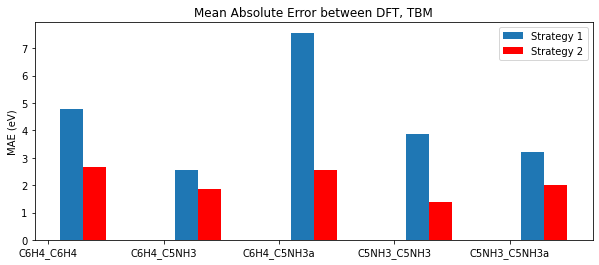

In [135]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
fig.set_figwidth(10)
ax.bar(range(len(esd)), esd.values(),  width=0.2, align='center')
ax.bar(np.arange(len(ecd))+.2, ecd.values(), width=0.2, color='r',align='center')
ax.legend(('Strategy 1', 'Strategy 2'))
plt.xticks(np.arange(len(ecd))-.2,list(esd.keys()))
ax.set_title('Mean Absolute Error between DFT, TBM')
ax.set_ylabel('MAE (eV)')
plt.show()

## compare eigenvalues

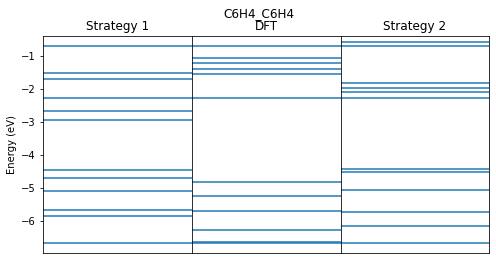

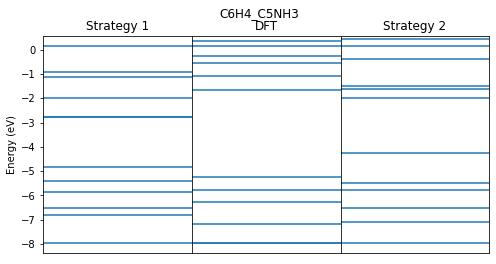

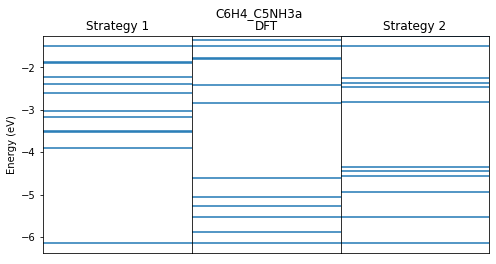

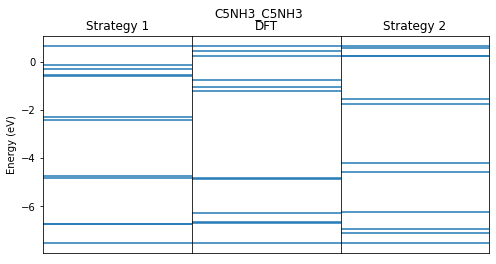

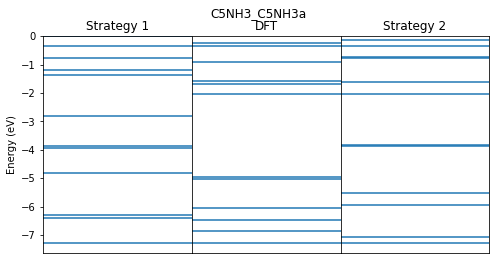

In [129]:
for k in E_ts_s.keys():
    E_d = E_ds[k]
    Et = E_ts_s[k]
    Etb = E_ts_c[k]
    
    fig, axs = plt.subplots(1,3, figsize=(8,4))
    fig.subplots_adjust(wspace=0)
    axs[1].set_yticks([])
    axs[2].set_yticks([])
    axs[0].set_xticks([])
    axs[1].set_xticks([])
    axs[2].set_xticks([])
    axs[0].set_ylabel('Energy (eV)')
    for i in range(len(E_d)):
        axs[0].axhline(Et[i])
        axs[1].axhline(E_d[i])
        axs[2].axhline(Etb[i])
    
    fig.suptitle(k)
    axs[0].set_title('Strategy 1')
    axs[1].set_title('DFT')
    axs[2].set_title('Strategy 2')

In [ ]:
# 1d C6H4_C6H4 simple
E_d = [-7.65165, -7.65165, -6.80908,-6.80908, -5.2358,-5.2358,
           -1.79467,-1.79467,0.27853,0.27853,0.37911,0.37911]

min_err = 100
for cc in np.linspace(-10,0,5):
    for ch in np.linspace(-10,0,5):
        for tcc in np.linspace(-10,0,5):
            for tch in np.linspace(-10,0,5):
                x = [cc, ch, tcc, tch]
                H = get_simple_ham_C6H4_C6H4(cc, ch, tcc, tch)
                opt = minimize(f, x, args=(H), method='Nelder-Mead')
                if opt.fun < min_err + .5:
                    min_err = opt.fun
                    print(round(cc,3), round(ch,3), round(tcc,3), round(tch,3), "   ", opt.fun)
                    E_t = test_H(opt.x)
                    E_t.sort()
min_err = 100
for cc in np.linspace(-10,0,5):
    for ch in np.linspace(-10,0,5):
        for tcc in np.linspace(-10,0,5):
            for tch in np.linspace(-10,0,5):
                x = [cc, ch, tcc, tch]
                H = get_simple_ham_C6H4_C6H4(cc, ch, tcc, tch)
                opt = minimize(f, x, args=(H), method='Nelder-Mead')
                if opt.fun < min_err + .5:
                    min_err = opt.fun
                    print(round(cc,3), round(ch,3), round(tcc,3), round(tch,3), "   ", opt.fun)
                    E_t = test_H(opt.x)
                    E_t.sort()

In [12]:
E_d = [-7.65165, -7.65165, -6.80908,-6.80908, -5.2358,-5.2358,
           -1.79467,-1.79467,0.27853,0.27853,0.37911,0.37911]
min_err = 100
for cc in np.linspace(-10,0,5):
    for ch in np.linspace(-10,0,5):
        for tcc in np.linspace(-10,0,5):
            for tch in np.linspace(-10,0,5):
                x = [cc, ch, tcc, tch]
                opt = minimize(f, x, method='Nelder-Mead')
                if opt.fun < min_err:
                    min_err = opt.fun
                    print(round(cc,3),round(tcc,3), "   ", opt.fun)
                    E_t = test_H(opt.x)
                    E_t.sort()

#                    np.linalg.norm(np.subtract(E_d,E_t))
                    for i in range(len(E_d)):
                        print(round(E_d[i],3), "   ",round(E_t[i],3))
        #         elif abs(opt.fun - min_err) < .5:
        #             print(round(cc,3),round(tcc,3), "   ", opt.fun, 'nl')


-10.0 -10.0     15.64113455677386
-7.652     -16.532
-7.652     -16.026
-6.809     -9.817
-6.809     -9.521
-5.236     -8.108
-5.236     -7.836
-1.795     -7.247
-1.795     -7.009
0.279     -5.534
0.279     -5.241
0.379     -0.407
0.379     0.185
-10.0 -10.0     4.915912726134493
-7.652     -9.407
-7.652     -8.541
-6.809     -6.231
-6.809     -4.654
-5.236     -4.598
-5.236     -4.255
-1.795     -1.868
-1.795     -1.496
0.279     -1.031
0.279     -0.785
0.379     0.367
0.379     0.862
-10.0 0.0     4.9158934110054116
-7.652     -9.412
-7.652     -8.546
-6.809     -6.233
-6.809     -4.655
-5.236     -4.6
-5.236     -4.257
-1.795     -1.871
-1.795     -1.498
0.279     -1.032
0.279     -0.787
0.379     0.365
0.379     0.86
-10.0 -10.0     4.91588667008212
-7.652     -9.412
-7.652     -8.546
-6.809     -6.233
-6.809     -4.655
-5.236     -4.601
-5.236     -4.257
-1.795     -1.871
-1.795     -1.499
0.279     -1.032
0.279     -0.787
0.379     0.365
0.379     0.86
-10.0 -5.0     4.8518413460

In [11]:
cc_0 = -3.7
ch_0 = -3.1
tcc_0 = -3
tch_0 = -1
x = [cc_0, ch_0, tcc_0, tch_0]
opt2 = minimize(f, x, method='Nelder-Mead')
print(opt2.fun)
E_t = test_H(opt2.x)
E_t.sort()

np.linalg.norm(np.subtract(E_d,E_t))
for i in range(len(E_d)):
    print(round(E_d[i],3), "   ",round(E_t[i],3))

4.000234310838086
-6.989     -8.224
-6.966     -7.869
-6.501     -6.653
-6.418     -6.653
-4.569     -6.232
-4.541     -6.232
-0.555     -1.752
-0.481     -1.752
0.274     -1.656
0.773     -1.656
0.912     -0.181
1.555     -0.02


In [125]:
E_d = np.array([-6.98890,-6.96555,-6.50099,-6.41836,-4.56937,-4.54055,
                     -0.55548,-0.48118,0.27372,0.77300,0.91215,1.55538])

In [134]:
np.linalg.norm(np.subtract(E_d,E_t))

for i in range(len(E_d)):
    print(round(E_d[i],3), "   ",round(E_t[i],3))

-6.989     -6.68
-6.966     -6.674
-6.501     -6.674
-6.418     -5.22
-4.569     -5.213
-4.541     -5.213
-0.555     0.36
-0.481     0.36
0.274     0.36
0.773     0.36
0.912     0.366
1.555     0.368


In [136]:
E_t = test_H(opt.x)
E_t.sort()
E_t

array([-6.67965663, -6.67368805, -6.67368805, -5.22030756, -5.21277873,
       -5.21277873,  0.3597344 ,  0.3597344 ,  0.36025676,  0.36025676,
        0.36570298,  0.36778559])

for C6H3_C6H3

-1.379 -0.922 -3 -1 2.7537444855780704 

-1.379 -7.931 -3 -1    3.144746942461843
-5.0 -10.0 -0.345 0.0     2.5930676950499927

-1.379 -0.33 -3 -1     2.8488064474852552

-3.7 -3.1 -2.68 -1 2.74224700615586 *** going with this one

In [165]:
cc_1 = -3.7
ch_1 = -3.1
tcc_1 = -2.68
tch_1 = -1

min_err = 100
# for cc in np.linspace(-5,-1, 7):
#    for ch in np.linspace(-10,-2,7):
#        for tcc in np.linspace(-10,-1,6):
for tch in np.linspace(-4,0,1001):
    x = [cc_1, ch_1, tcc_1, tch]
    opt = minimize(f, x, method='Nelder-Mead')
    if opt.fun < min_err:
        min_err = opt.fun
        print(round(cc_1,3),round(ch_1,3),round(tcc_1,3),tch, "   ", opt.fun)
    elif abs(opt.fun - min_err) < .5:
        print(round(cc_1,3),round(ch_1,3),round(tcc_1,3),tch, "   ", opt.fun, 'nl')


-3.7 -3.1 -2.68 -4.0     19.035242843326518
-3.7 -3.1 -2.68 -3.996     18.65841839104447
-3.7 -3.1 -2.68 -3.992     18.71589147739145 nl
-3.7 -3.1 -2.68 -3.988     18.856068160266094 nl
-3.7 -3.1 -2.68 -3.984     18.614972279543725
-3.7 -3.1 -2.68 -3.98     18.7078890698777 nl
-3.7 -3.1 -2.68 -3.976     18.66977891513641 nl
-3.7 -3.1 -2.68 -3.972     18.84414559325288 nl
-3.7 -3.1 -2.68 -3.968     18.52258959315014
-3.7 -3.1 -2.68 -3.964     18.48592181715376
-3.7 -3.1 -2.68 -3.96     18.769449249289103 nl
-3.7 -3.1 -2.68 -3.956     18.95929105063579 nl
-3.7 -3.1 -2.68 -3.952     18.923483055809587 nl
-3.7 -3.1 -2.68 -3.948     18.703440269614063 nl
-3.7 -3.1 -2.68 -3.944     18.861413535790025 nl
-3.7 -3.1 -2.68 -3.936     18.962819797614703 nl
-3.7 -3.1 -2.68 -3.932     18.972033920661396 nl
-3.7 -3.1 -2.68 -3.928     18.721698215343746 nl
-3.7 -3.1 -2.68 -3.924     18.695410353122448 nl
-3.7 -3.1 -2.68 -3.92     18.262978243181706
-3.7 -3.1 -2.68 -3.916     17.099724939941424
-3.7 -

In [12]:
cc_0 = -3.7
ch_0 = -3.1
tcc_0 = -2.68
tch_0 = -1.064
x = [cc_0, ch_0, tcc_0, tch_0]
opt2 = minimize(f, x, method='Powell')#Nelder-Mead')
opt2.fun
print(opt2.fun)
E_t = test_H(opt2.x)
E_t.sort()
E_d = np.array([-7.6852,
 -7.6738,
 -7.1884,
 -6.3742,
 -5.7786,
 -5.1724,
 -1.7764,
 -0.7801,
 -0.594,
 -0.2925,
 -0.0612,
 0.4458])
np.linalg.norm(np.subtract(E_d,E_t))
for i in range(len(E_d)):
    print(round(E_d[i],3), "   ",round(E_t[i],3))

4.00029147715677
-7.685     -8.228
-7.674     -7.88
-7.188     -6.656
-6.374     -6.656
-5.779     -6.244
-5.172     -6.244
-1.776     -1.756
-0.78     -1.756
-0.594     -1.662
-0.292     -1.662
-0.061     -0.185
0.446     -0.026


In [168]:
cc_0 = -3.7
ch_0 = -3.1
tcc_0 = -2.68
tch_0 = -1
x = [cc_0, ch_0, tcc_0, tch_0]
opt2 = minimize(f, x, method='Powell')#Nelder-Mead')
opt2.fun

E_t = test_H(opt2.x)
E_t.sort()
E_d = np.array([-6.98890,-6.96555,-6.50099,-6.41836,-4.56937,-4.54055,
                     -0.55548,-0.48118,0.27372,0.77300,0.91215,1.55538])
np.linalg.norm(np.subtract(E_d,E_t))
for i in range(len(E_d)):
    print(round(E_d[i],3), "   ",round(E_t[i],3))

-6.989     -6.761
-6.966     -6.681
-6.501     -6.681
-6.418     -5.334
-4.569     -5.234
-4.541     -5.234
-0.555     0.4
-0.481     0.4
0.274     0.407
0.773     0.407
0.912     0.48
1.555     0.507


For C6H4_C6H4
for 4 variables, we get 4.02 as the min,
for 2 variables it's -7.93, -1.0 for 9.13
best so far:
cc_0 = -3.7, ch_0 = -3.1, tcc_0 = -3, tch_0 = -1: 4.000234310838086

In [ ]:
# mu_0 = -3.7172
# t_0 = -2.5626
# x = [mu_0, t_0]
# opt = minimize(benz, x, method='Nelder-Mead')

4.000234310838086

In [99]:
a = test_H(opt.x)
a.sort()
a

array([-8.27846128, -7.26800118, -6.94954101, -5.65690009, -4.87995525,
       -4.73540571, -1.6459507 , -1.29140715, -1.18035585, -0.89817503,
        0.72472844,  0.93472244])

In [53]:
disp_H(opt.x)

[[-5.56 -0.26  0.    0.    0.   -0.26 -1.84  0.    0.    0.    0.    0.  ]
 [-0.26 -2.59 -0.26  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.26 -5.56 -0.26  0.    0.    0.    0.   -1.84  0.    0.    0.  ]
 [ 0.    0.   -0.26 -2.59 -0.26  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.26 -2.59 -0.26  0.    0.    0.    0.    0.    0.  ]
 [-0.26  0.    0.    0.   -0.26 -2.59  0.    0.    0.    0.    0.    0.  ]
 [-1.84  0.    0.    0.    0.    0.   -5.56 -0.26  0.    0.    0.   -0.26]
 [ 0.    0.    0.    0.    0.    0.   -0.26 -2.59 -0.26  0.    0.    0.  ]
 [ 0.    0.   -1.84  0.    0.    0.    0.   -0.26 -5.56 -0.26  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.   -0.26 -2.59 -0.26  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.26 -2.59 -0.26]
 [ 0.    0.    0.    0.    0.    0.   -0.26  0.    0.    0.   -0.26 -2.59]]


In [101]:
for i in range(len(b)):
    print(a[i]-b[i])

-0.5932612846751546
0.4057988217778563
0.23885898724074472
0.7172999094372043
0.8986447476805601
0.4369942882474218
0.13044930325408033
-0.5113071495476091
-0.5863558459586286
-0.6056750302151752
0.7859284376989811
0.48892244433043064


In [100]:
a.sort()
a

array([-8.27846128, -7.26800118, -6.94954101, -5.65690009, -4.87995525,
       -4.73540571, -1.6459507 , -1.29140715, -1.18035585, -0.89817503,
        0.72472844,  0.93472244])

In [55]:
b = [-7.6852,
 -7.6738,
 -7.1884,
 -6.3742,
 -5.7786,
 -5.1724,
 -1.7764,
 -0.7801,
 -0.594,
 -0.2925,
 -0.0612,
 0.4458]

In [86]:
c = [2.53114463, -9.96554463,  0.78425869,  0.4291739,  -0.79951521, -1.61522927,
 -2.1334261,  -8.21865869, -7.8635739,  -6.63488479, -5.3009739,  -5.81917073]
c.sort()
c

[-9.96554463,
 -8.21865869,
 -7.8635739,
 -6.63488479,
 -5.81917073,
 -5.3009739,
 -2.1334261,
 -1.61522927,
 -0.79951521,
 0.4291739,
 0.78425869,
 2.53114463]

In [87]:
for i in range(12):
    print(a[i] - b[i])
    print(c[i] - b[i])
    print()

1.10799891
-2.28034463

1.9957201500000004
-0.5448586899999999

1.54233449
-0.6751738999999999

1.4955315000000002
-0.26068479

1.2287870400000003
-0.04057072999999978

0.8065850000000001
-0.12857390000000013

-1.03920348
-0.3570260999999999

-1.77020439
-0.8351292699999999

-1.57517511
-0.20551521000000006

-1.5592166
0.7216739

-1.3571749400000002
0.8454586900000001

-1.22914359
2.08534463



In [10]:
def benz(x):
    """
    x is the unknowns
    """
    
    mu = x[0]
    t = x[1]
    
    H = np.array([
        np.array([mu,t,0,0,0,t]),   # 1
        np.array([t,mu,t,0,0,0]),   # 2
        np.array([0,t,mu,t,0,0]),   # 3
        np.array([0,0,t,mu,t,0]),   # 4
        np.array([0,0,0,t,mu,t]),   # 5
        np.array([t,0,0,0,t,mu]),   # 6
    ])

    E_t = np.linalg.eig(H)[0]
    E_d = get_dft_energies(13,19,"C6H4",conf="B")

    diff = np.subtract(E_d, E_t)

    return np.linalg.norm(diff)